In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_excel('Sentiment Analysis_Advanced.xlsx')


def cleanTxt(text):
   text =re.sub(r'@[A-Za-z0-9]+', '', text)
   text =re.sub(r'#', '', text)
   text =re.sub(r'https?:\/\/\S+', '', text)
   text =re.sub(r'?', '', text)
   return text 

   df['Comment_Content'] = df['Comment_Content'].apply(cleanTxt)


In [ ]:
df

,Comment_Content
0,"said it today, so should"
1,If he lists enough specific examples of stuff ...
2,I’m not sure he can say it isn’t working but h...
3,Here's what Keir Starmer should say (in more p...
4,"Something changed recently\n\nMany large, hous..."
...,...
273,But it's not - Wales' two largest employers by...
274,"Free flights and $1,000 vouchers: Australian h..."
275,Australia might be locked down for years if th...
276,Couldn’t agree more. How about they throw thos...


In [ ]:

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create columns: Subjectivity and Polarity

df['Subjectivity'] = df['Comment_Content'].apply(getSubjectivity)
df['Polarity'] = df['Comment_Content'].apply(getPolarity)

df

,Comment_Content,Subjectivity,Polarity
0,"said it today, so should",0.000000,0.000000
1,If he lists enough specific examples of stuff ...,0.375000,0.000000
2,I’m not sure he can say it isn’t working but h...,0.588889,-0.250000
3,Here's what Keir Starmer should say (in more p...,0.500000,0.500000
4,"Something changed recently\n\nMany large, hous...",0.669643,0.041071
...,...,...,...
273,But it's not - Wales' two largest employers by...,0.273333,0.200000
274,"Free flights and $1,000 vouchers: Australian h...",0.400000,0.200000
275,Australia might be locked down for years if th...,0.212963,-0.107407
276,Couldn’t agree more. How about they throw thos...,0.308333,0.212500


In [ ]:
#Create a functiont to compute the positive, negative, and neutral analysis

def getAnalysis(score):
    if score < 0: 
       return 'Negative'
    elif score == 0:
       return 'Neutral'
    else: 
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
    
df

,Comment_Content,Subjectivity,Polarity,Analysis
0,"said it today, so should",0.000000,0.000000,Neutral
1,If he lists enough specific examples of stuff ...,0.375000,0.000000,Neutral
2,I’m not sure he can say it isn’t working but h...,0.588889,-0.250000,Negative
3,Here's what Keir Starmer should say (in more p...,0.500000,0.500000,Positive
4,"Something changed recently\n\nMany large, hous...",0.669643,0.041071,Positive
...,...,...,...,...
273,But it's not - Wales' two largest employers by...,0.273333,0.200000,Positive
274,"Free flights and $1,000 vouchers: Australian h...",0.400000,0.200000,Positive
275,Australia might be locked down for years if th...,0.212963,-0.107407,Negative
276,Couldn’t agree more. How about they throw thos...,0.308333,0.212500,Positive


In [ ]:
# Print comments with positive sentiment 

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) +  ') '+sortedDF['Comment_Content'][i])
        print()
        j = j+1



1) Here's what Keir Starmer should say (in more polished form):

The Tories had 9 months to get Brexit done. Instead we have food shortages, crops rotting in fields, the highest energy prices in Europe, gaps on shelves and the hospitality sector on its knees. Brexit isn't working.

2) Something changed recently

Many large, household name firms are now willing to explicitly name Brexit as the cause of their problems - something they've been reluctant to do until now because it antagonises a portion of their customer base.

Labour could amplify their voices.

3) If your concern is Labour's past support for the deal Boris Johnson cooked up, don't be so worried!

The first party to run away from a clearly ticking hand grenade will fare better than the one still clenching it, even if both were seen to be holding it in the first place.

4) Interested as to why he can’t say it’s not working?

5) Barely …

6) Because Labour voted alongside the Tories and then later for Johnson's 'oven ready d

In [ ]:
# Print comments with negative sentiment 

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) +  ') '+sortedDF['Comment_Content'][i])
        print()
        j = j+1

1) I’m not sure he can say it isn’t working but he can definitely attack the tories incompetent way of doing it and their poor deal making and fact they’ve got no clue whatsoever

2) I'm hoping this will form part of his speech to conference. If brexit isn't mentioned we're in trouble.

3) I get what you're saying, but I think brexit voters need to come to their own conclusion, because there is no convincing them with words.  And sadly it needs to be a lot worse before it reaches that point.

4) All of the above is due to companies under paying staff.

5) Your judging it after less than a year + Covid even you can’t be that negative.

6) I don’t support Boris or the Tory’s and didn’t vote for Brexit. But to imply the energy price increases are to do with Brexit is both wrong and stupid. That’s not the way you get people to support re-joining or indeed to vote Labour.

7) Totally agree, dreadful scenes today at the local supermarket.

8) Your wrong

9) Come on Keir. Do a Raducanu. Land 

In [ ]:
# Print comments with neutral sentiment 

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Neutral'):
        print(str(j) +  ') '+sortedDF['Comment_Content'][i])
        print()
        j = j+1

1) said it today, so should

2) If he lists enough specific examples of stuff that Brexit broke, it should be obvious to wavering voters and to those not yet irredeemably lost to the Tories that he's adjusting Labour's position on Brexit BECAUSE it has been proven not to work.

Pragmatism not betrayal.

3) He whipped Labour to back the deal. Why would he mention it?

4) Why isn’t he?

JohnsonOut

5) Fat chance. He won't mention brexit.

6) But lacks the courage

7) Please read this

8) 9 months? 5 years!

9) How would he explain similar issues throughout the EU and US?

10) Not possible for him to say given he voted for the deal.

11) Conservatives +20

12) Seems obvious that if he fights to rejoin on these grounds he could unite Labour. Come on Keir, bite the bullet!

13) A customer in Sainsbury's on Friday was saying this, except he pointed out they had 4 years to prepare.

14) What similar issues?

15) The problem is Johnson will then say what would you (KS) do that will work to whi

In [ ]:
#Percentage of positive comments
pcomments =df[df.Analysis == 'Positive']
pcomments = pcomments['Comment_Content']
pcomments 

round( (pcomments.shape[0] / df.shape [0]) *100, 0)



38.0

In [ ]:

#Percentage of negative comments
ncomments =df[df.Analysis == 'Negative']
ncomments = ncomments['Comment_Content']
ncomments 

round( (ncomments.shape[0] / df.shape [0]) *100, 0)





27.0

In [ ]:
#percentage of neutral comments
 
neutralcomments =df[df.Analysis == 'Neutral']
neutralcomments = neutralcomments['Comment_Content']
neutralcomments 

round( (neutralcomments.shape[0] / df.shape [0]) *100, 0)

35.0

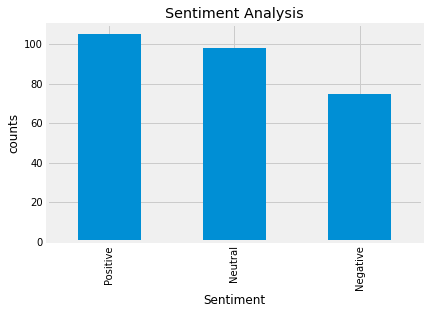

In [ ]:
#Plot the sentiments

df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('counts')
df['Analysis'].value_counts().plot(kind='bar')

plt.show()

In [ ]:
df

,Comment_Content,Subjectivity,Polarity,Analysis
0,"said it today, so should",0.000000,0.000000,Neutral
1,If he lists enough specific examples of stuff ...,0.375000,0.000000,Neutral
2,I’m not sure he can say it isn’t working but h...,0.588889,-0.250000,Negative
3,Here's what Keir Starmer should say (in more p...,0.500000,0.500000,Positive
4,"Something changed recently\n\nMany large, hous...",0.669643,0.041071,Positive
...,...,...,...,...
273,But it's not - Wales' two largest employers by...,0.273333,0.200000,Positive
274,"Free flights and $1,000 vouchers: Australian h...",0.400000,0.200000,Positive
275,Australia might be locked down for years if th...,0.212963,-0.107407,Negative
276,Couldn’t agree more. How about they throw thos...,0.308333,0.212500,Positive


In [ ]:
#Create label

lb_make = LabelEncoder()

df['label'] = lb_make.fit_transform(df['Analysis'].astype(str))

In [ ]:
df.head()

,Comment_Content,Subjectivity,Polarity,Analysis,label
0,"said it today, so should",0.000000,0.000000,Neutral,1
1,If he lists enough specific examples of stuff ...,0.375000,0.000000,Neutral,1
2,I’m not sure he can say it isn’t working but h...,0.588889,-0.250000,Negative,0
3,Here's what Keir Starmer should say (in more p...,0.500000,0.500000,Positive,2
4,"Something changed recently\n\nMany large, hous...",0.669643,0.041071,Positive,2


In [ ]:
#Create your 'x'... feature
x =df.drop(columns =['Comment_Content','Subjectivity', 'Analysis','label'])

In [ ]:
#Create 'y'.... label 
y = df['label']

In [ ]:
#Split your test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.30, random_state=2) 

In [ ]:
#check
y_train.shape,y_test.shape

((194,), (84,))

In [ ]:
#check
x_train.shape,x_test.shape

((194, 1), (84, 1))

In [ ]:
logistic_regression = LogisticRegression()

In [ ]:
model_1=logistic_regression.fit(x_train, y_train)

In [ ]:
model_1

LogisticRegression()

In [ ]:
y_pred_test = model_1.predict(x_test)

In [ ]:
y_pred_test

array([0, 1, 1, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1, 0,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0,
       2, 0, 0, 2, 0, 1, 1, 2, 1, 2, 0, 2, 0, 1, 2, 1, 1, 1])

In [ ]:
model_1.classes_

array([0, 1, 2])

In [ ]:
model_1.intercept_

array([-0.12362783,  0.27288093, -0.1492531 ])

In [ ]:
model_1.coef_

array([[-4.57396589],
       [-0.38488483],
       [ 4.95885072]])

In [ ]:
model_1.predict_proba(x)

array([[2.88906643e-01, 4.29495973e-01, 2.81597384e-01],
       [2.88906643e-01, 4.29495973e-01, 2.81597384e-01],
       [6.20513346e-01, 3.23689788e-01, 5.57968656e-02],
       [7.83712681e-03, 9.46249882e-02, 8.97537885e-01],
       [2.37668803e-01, 4.19657302e-01, 3.42673895e-01],
       [1.21209410e-01, 3.48559429e-01, 5.30231161e-01],
       [6.32830617e-02, 2.68109837e-01, 6.68607101e-01],
       [2.27121901e-01, 4.16318128e-01, 3.56559971e-01],
       [5.59276045e-01, 3.59723515e-01, 8.10004397e-02],
       [4.76533196e-01, 3.98237080e-01, 1.25229724e-01],
       [1.72750540e-01, 3.90436546e-01, 4.36812913e-01],
       [2.88906643e-01, 4.29495973e-01, 2.81597384e-01],
       [2.88906643e-01, 4.29495973e-01, 2.81597384e-01],
       [9.09445292e-02, 3.12490707e-01, 5.96564764e-01],
       [3.11591236e-02, 1.92462903e-01, 7.76377973e-01],
       [2.88906643e-01, 4.29495973e-01, 2.81597384e-01],
       [2.88906643e-01, 4.29495973e-01, 2.81597384e-01],
       [3.72944917e-01, 4.26717

In [ ]:
model_1.predict(x)

array([1, 1, 0, 2, 1, 2, 2, 1, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0,
       0, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1,
       0, 2, 0, 1, 2, 2, 1, 0, 1, 0, 1, 0, 2, 2, 0, 2, 1, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1,
       1, 2, 0, 2, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 0, 1,
       1, 1, 2, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 1, 1,
       0, 2, 1, 0, 0, 2, 0, 1, 0, 1, 1, 1, 0, 2, 0, 1, 1, 1, 2, 0, 1, 1,
       2, 2, 0, 1, 0, 0, 2, 0, 2, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 1,
       1, 2, 2, 2, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       0, 0, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 2, 2,
       1, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1])

In [ ]:
model_1.score(x, y)

0.8848920863309353

In [ ]:
confusion_matrix(y, model_1.predict(x))

array([[57, 18,  0],
       [ 0, 98,  0],
       [ 0, 14, 91]])

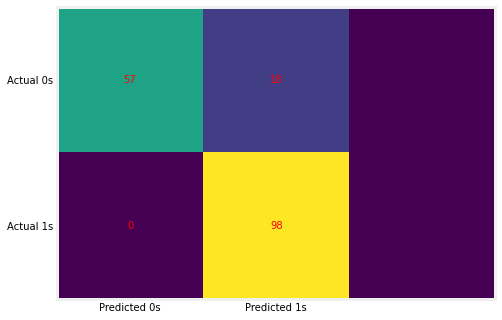

In [ ]:
cm = confusion_matrix(y, model_1.predict(x))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
print(classification_report(y, model_1.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86        75
           1       0.75      1.00      0.86        98
           2       1.00      0.87      0.93       105

    accuracy                           0.88       278
   macro avg       0.92      0.88      0.88       278
weighted avg       0.91      0.88      0.89       278

